### loc and iloc are row,column fomat when accessing . E.g df.iloc[row1,column10] Normal python behaviour: df[column1, row10]. for iloc and loc, negative indexing means start from tail end of data e.g df.iloc[-5:] gives last 5 entries
### can also do label based searching in loc
### df.loc[0, 'colname']
### iloc treats dataset as big matrix
### iloc uses exclusive indexing so 0:10 selects 0...9 and loc has inclusive indexing so 0:10 selects 0...10
### change index of df using df.set_index("index")

### and condition: df.loc[(x==1) & y==2)]
### or condition: df.loc[(x==1) | (y==2)]
### in contion as in python : df.loc[ df.colname.isin(collist)]
### isnull and notnull() : df.loc[df.colname.isnull], df.loc[df.colname.notnull()]

### for unique in colnames : use df.colname.unique()
### for count of each value in column : df.colname.value_counts()
### map returns Series, apply returns Data Frames
### can also use direct operations like numpy
### index of max value (reviews.points/reviews.price).idxmax()
### agg lets you run a bunch of functions on a dataframe simultaneously :  df.groupby(['colname']).price.agg([len, min, max]) (result df: colname, len,min , max)
### column in groupby will be used as indices
### reset indices after groupby using df_groupedby.reset_index()
### sort using df.sort_values(by='colname', ascending=t/f). default it is ascending. can also sort by multiple columns :  df.sort_values(by=['col1','col2'])
### df.column.astype('type') to change datatype of column
### df.column.fillna("value") replace na with "value"
### df.column.replace("val1,"val2") to replace non null values
### renaming columns reviews.rename(columns={'points': 'score'})
### rename indices using df.rename(index={0:'ind0',1:'ind1'})
### rename row and column axes using df.rename_axis('axis1',axis='rows/columns')
### combining dataframes using pd.concat[df1,df2]) useful when you have different dfs with same columns
### join to join dfs using common columns df1.join(df2,lsuffix='',rsuffix='')
### sns.barplot(x=,y=)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


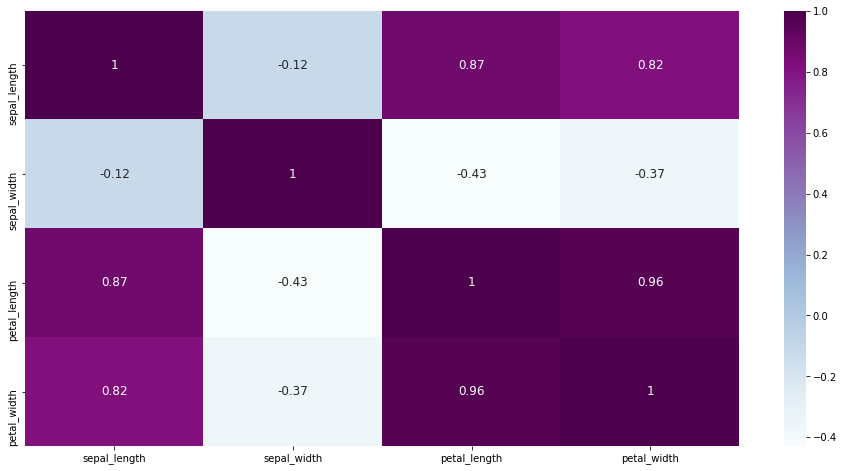

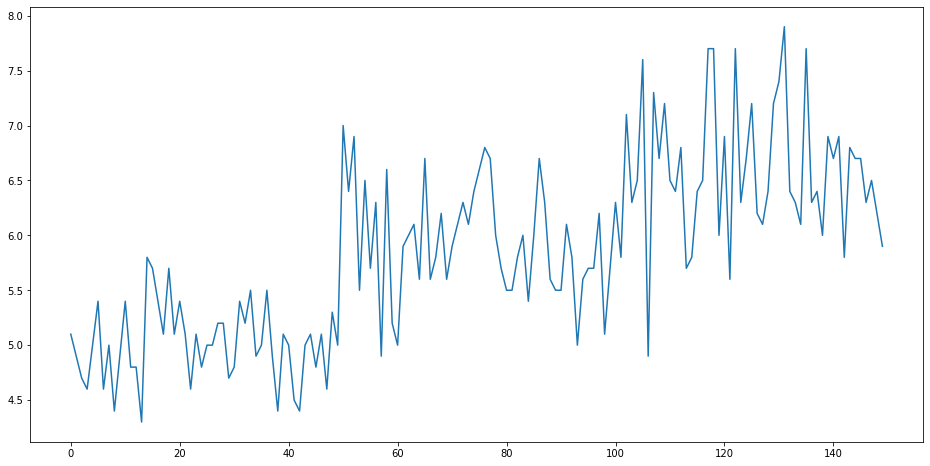

In [4]:
plt.figure(figsize=(16,8))
sns.heatmap(iris.corr(),annot=True,cmap='BuPu', annot_kws={"size":12})
plt.figure(figsize=(16,8))
sns.lineplot(data=iris['sepal_length'])

# scatterplots
- scatterplot
- regplot

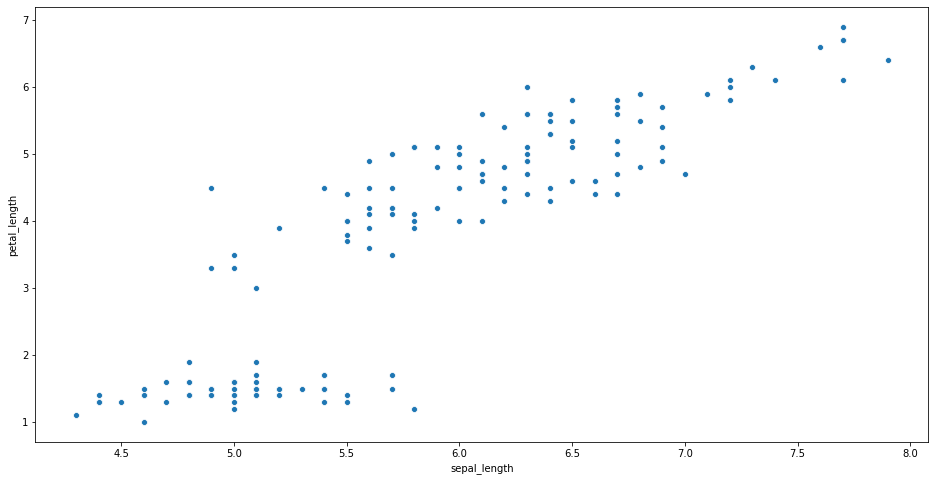

In [5]:
plt.figure(figsize=(16,8))
sns.scatterplot(iris['sepal_length'],iris['petal_length'])
plt.show()

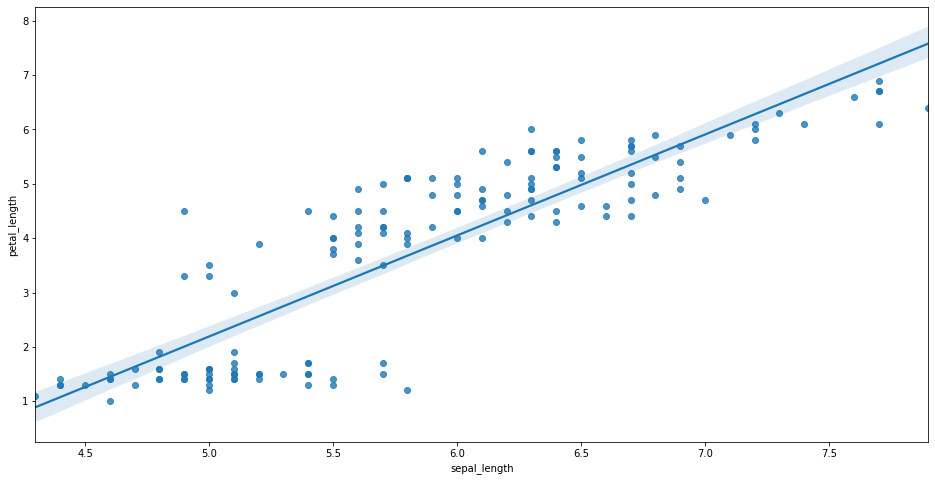

In [6]:
plt.figure(figsize=(16,8))
sns.regplot(iris['sepal_length'],iris['petal_length'])
plt.show()

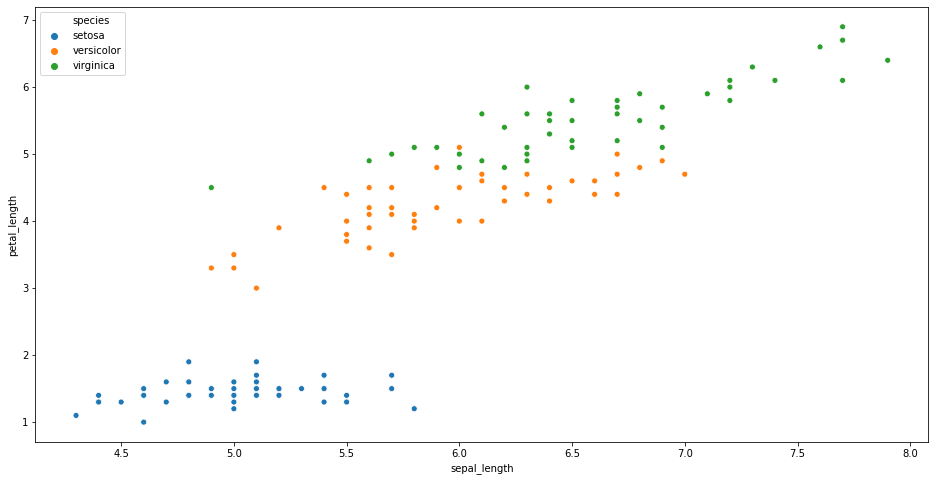

In [7]:
# color based on a column
plt.figure(figsize=(16,8))
sns.scatterplot(iris['sepal_length'],iris['petal_length'],hue=iris['species'])
plt.show()

<Figure size 1152x576 with 0 Axes>

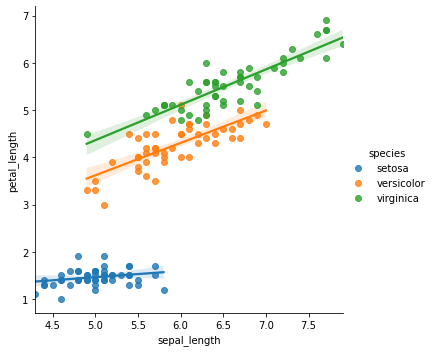

In [8]:
plt.figure(figsize=(16,8))
sns.lmplot(x='sepal_length',y='petal_length',hue='species',data=iris)
plt.show()

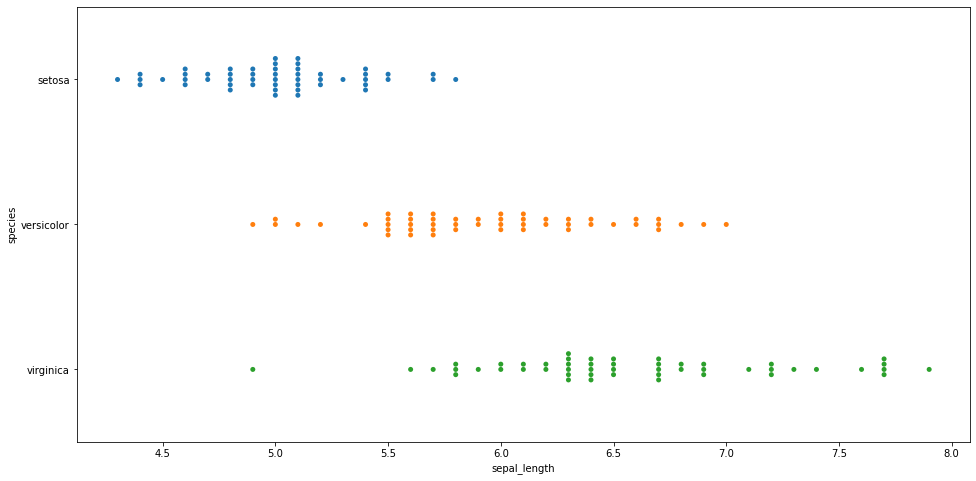

In [9]:
# using scatterplot for categorical variable using swarm plot
plt.figure(figsize=(16,8))
sns.swarmplot(iris['sepal_length'],iris['species'])

# histogtams and distribution plots

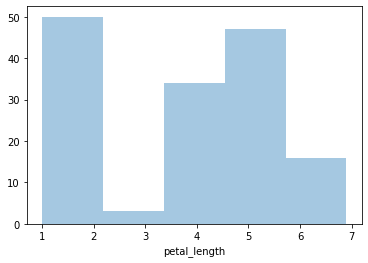

In [10]:
# histogram plot
sns.distplot(iris['petal_length'],kde=False)

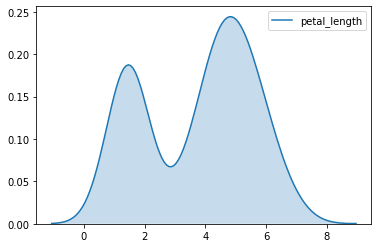

In [11]:
# Kernel density estimation plot (KDE) or area under the curve plots for histogram functions
sns.kdeplot(iris['petal_length'],shade=True) # shade is flag for coloring area under the curve

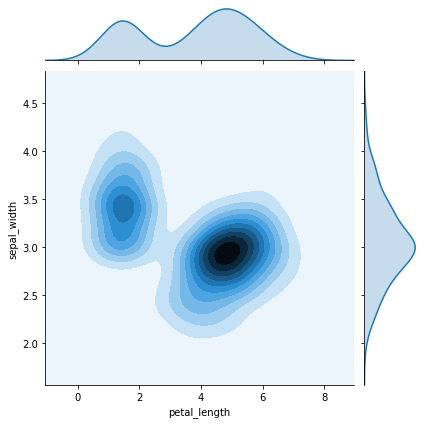

In [12]:
# we can also have kde for 2 columns using jointplot
sns.jointplot(x=iris['petal_length'],y=iris['sepal_width'],kind='kde')

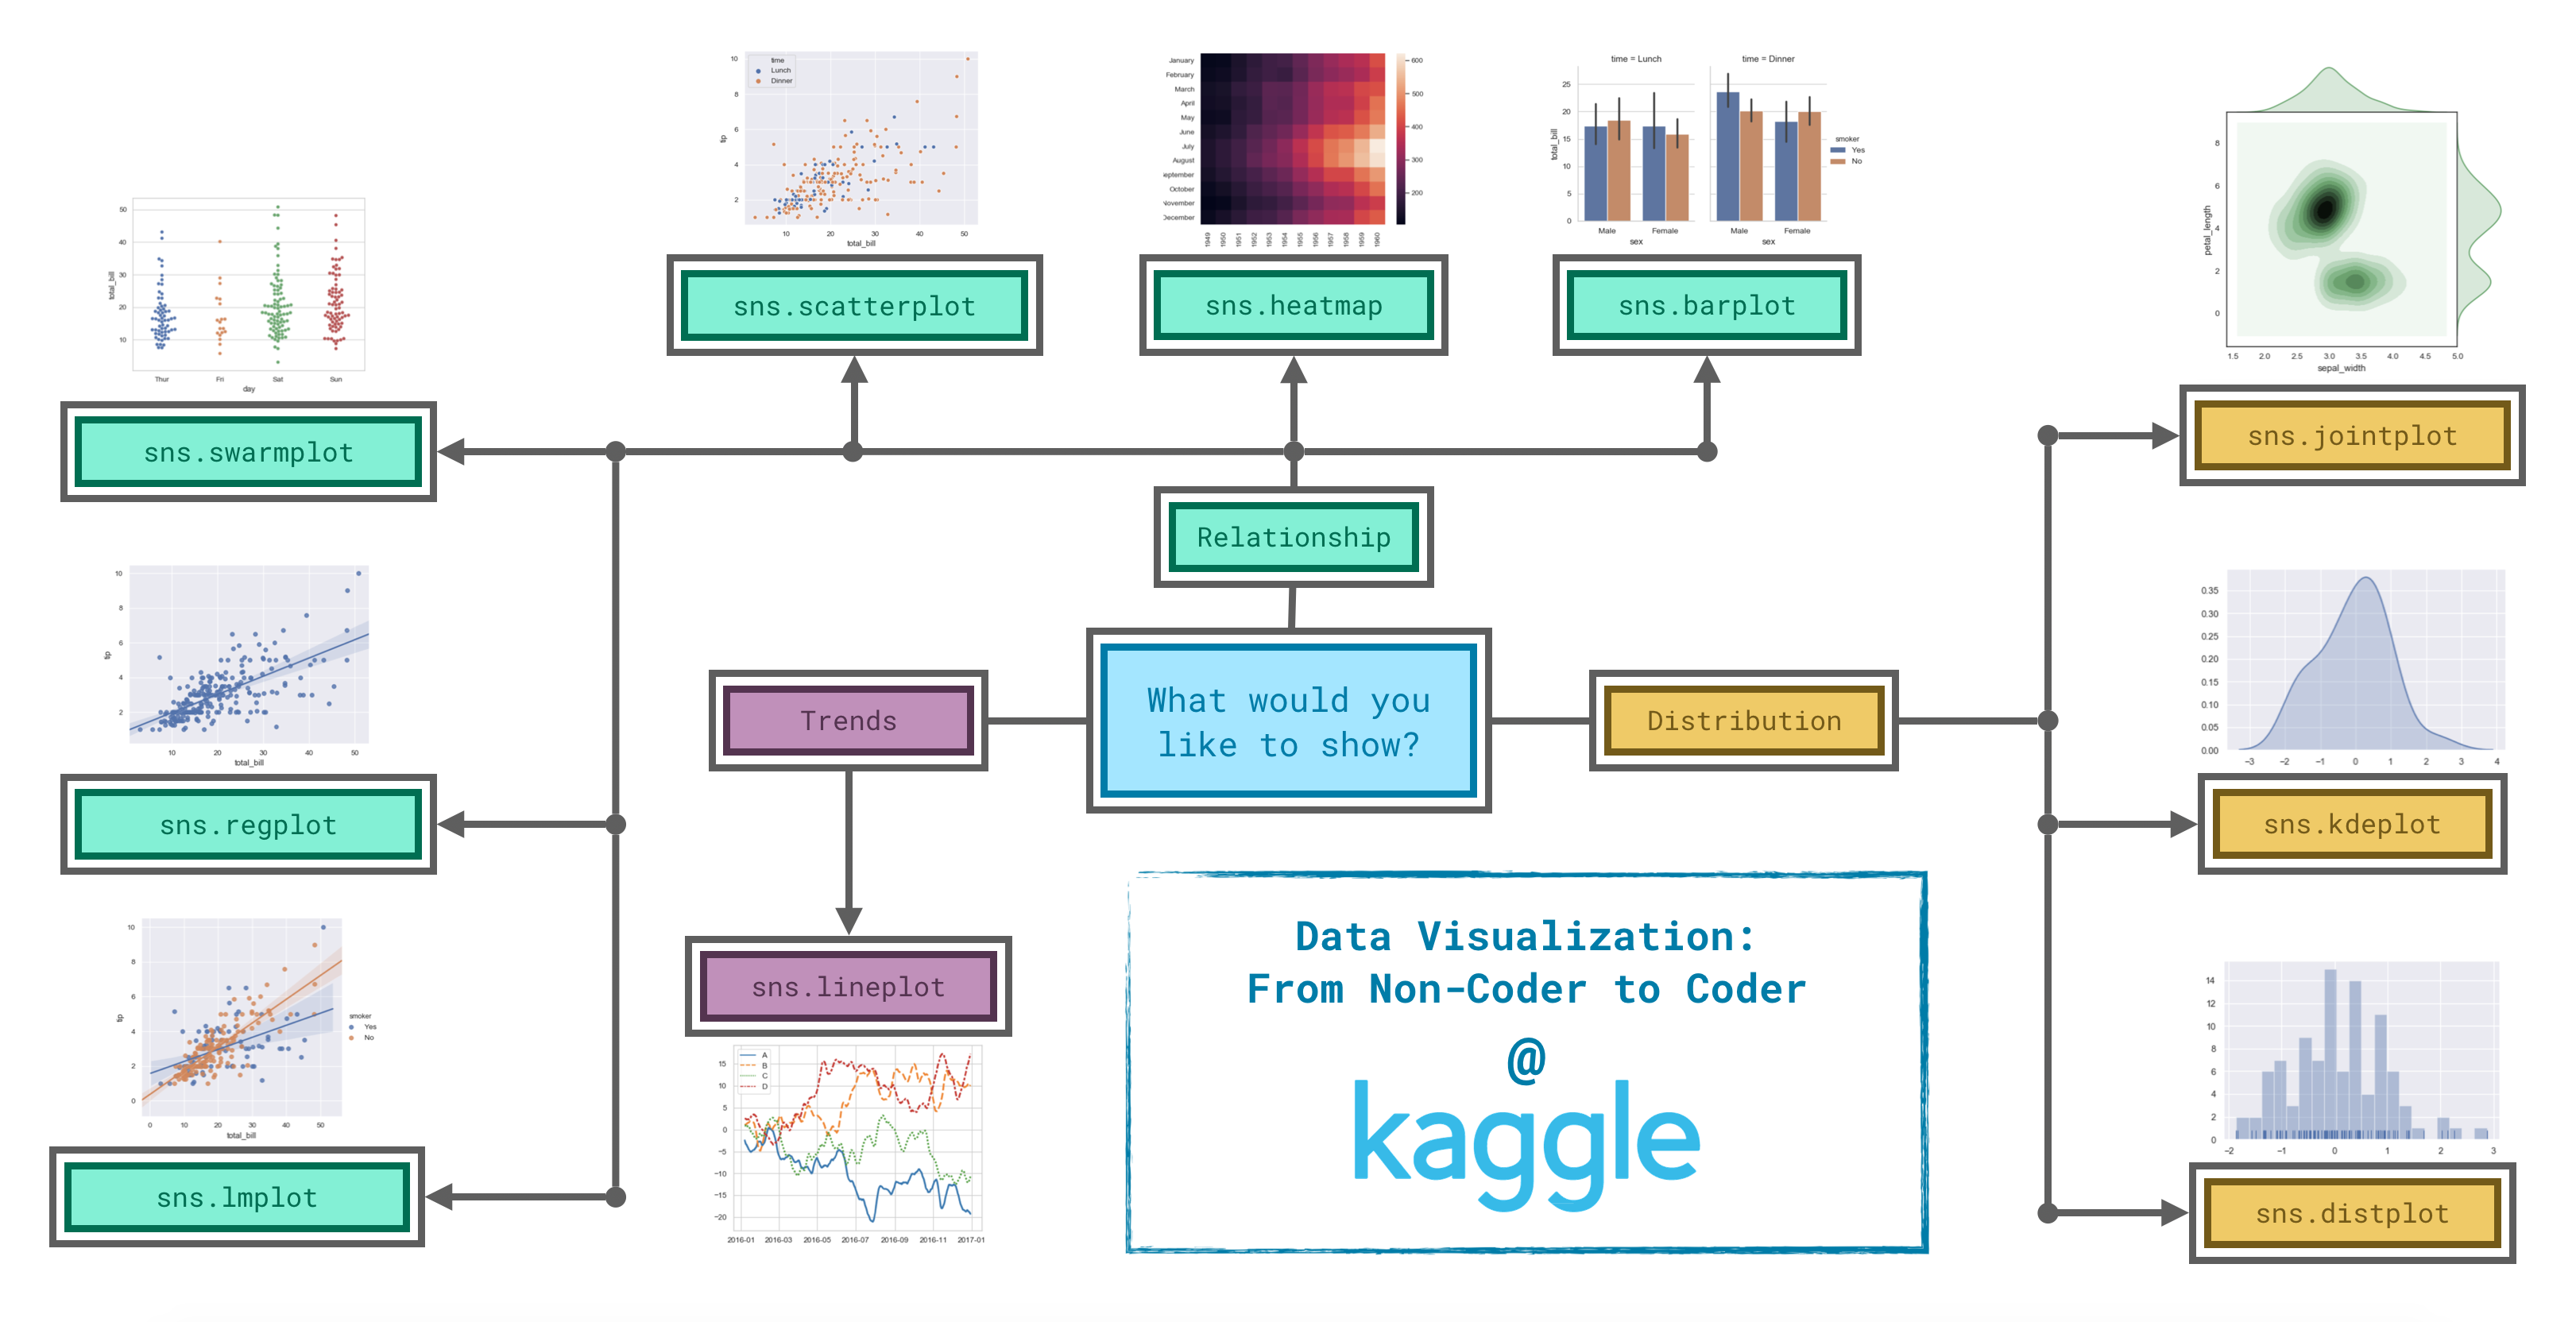

In [19]:
# filter data using df.query()
print(iris.head())
iris_sentosa = iris.query('species=="setosa"')
# mutate equivalent in pandas
iris_sentosa = iris_sentosa.assign(gt = (iris_sentosa['sepal_width']>3.2).astype(int))
iris_sentosa

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width,species,gt
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [ ]:
# preparing categorical variables
